# 隠れ層のアクティベーション分布

In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [8]:
x = np.random.randn(1000, 100)
node_num = 100
hidden_layer_size = 5
activations = {}

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i - 1]
    w = np.random.randn(node_num, node_num) * 1
    z = np.dot(x, w)
    a = sigmoid(z)
    activations[i] = a

In [12]:
activations[0].flatten().shape

(100000,)

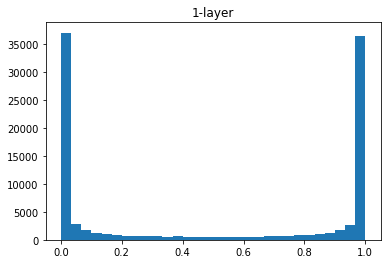

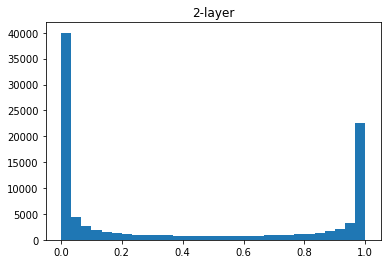

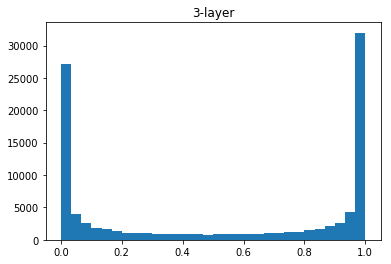

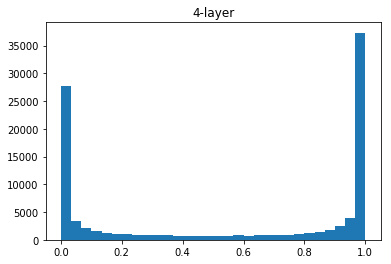

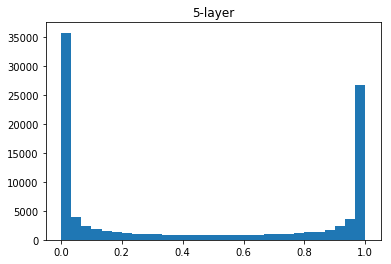

In [16]:
for i, a in activations.items():
    plt.figure()
    plt.title(str(i + 1) + '-layer')
    plt.hist(a.flatten(), 30, range=(0, 1))
plt.show()

In [17]:
x = np.random.randn(1000, 100)
node_num = 100
hidden_layer_size = 5
activations = {}

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i - 1]
    w = np.random.randn(node_num, node_num) * 0.01
    z = np.dot(x, w)
    a = sigmoid(z)
    activations[i] = a

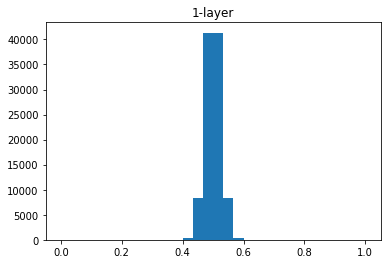

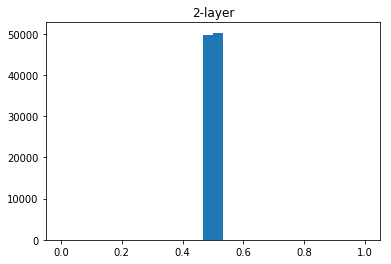

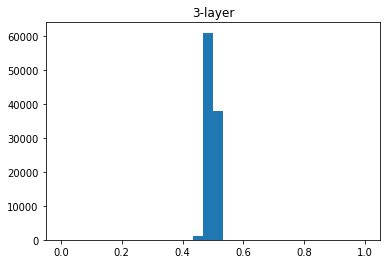

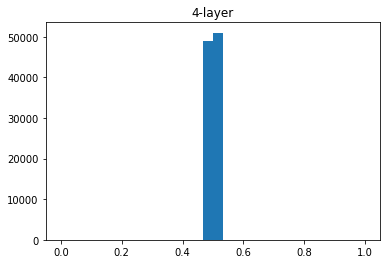

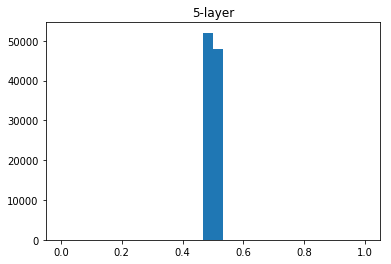

In [18]:
for i, a in activations.items():
    plt.figure()
    plt.title(str(i + 1) + '-layer')
    plt.hist(a.flatten(), 30, range=(0, 1))
plt.show()

In [19]:
x = np.random.randn(1000, 100)
node_num = 100
hidden_layer_size = 5
activations = {}

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i - 1]
    w = np.random.randn(node_num, node_num) / np.sqrt(node_num)
    z = np.dot(x, w)
    a = a(z)
    activations[i] = a

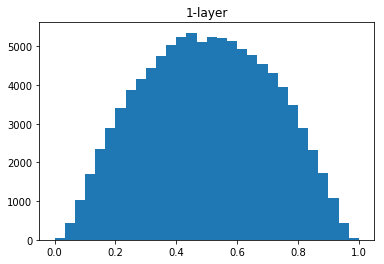

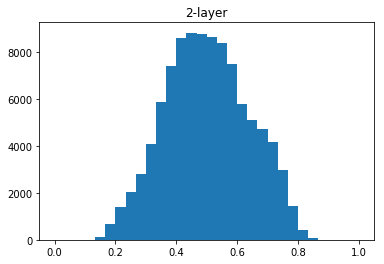

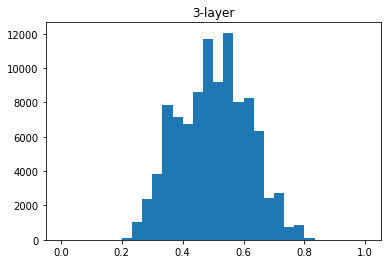

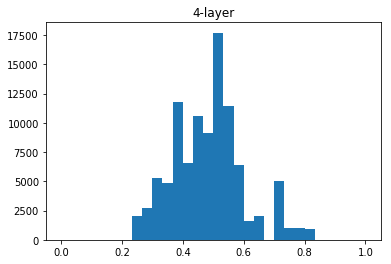

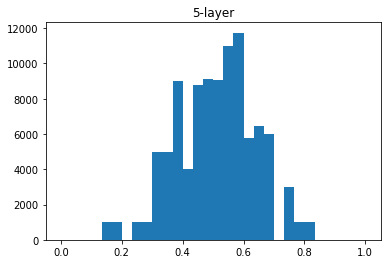

In [20]:
for i, a in activations.items():
    plt.figure()
    plt.title(str(i + 1) + '-layer')
    plt.hist(a.flatten(), 30, range=(0, 1))
plt.show()

## 同じことをPyTorchのモデルで実装

In [81]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [33]:
class Model(nn.Module):
    
    def __init__(self):
        super(Model, self).__init__()
        self.hidden_size = 100
        
        self.linear1 = nn.Linear(100, self.hidden_size)
        self.linear2 = nn.Linear(self.hidden_size, self.hidden_size)
        self.linear3 = nn.Linear(self.hidden_size, self.hidden_size)
        self.linear4 = nn.Linear(self.hidden_size, self.hidden_size)
        self.linear5 = nn.Linear(self.hidden_size, self.hidden_size)
    
    def forward(self, x):
        x1 = torch.sigmoid(self.linear1(x))
        x2 = torch.sigmoid(self.linear2(x1))
        x3 = torch.sigmoid(self.linear3(x2))
        x4 = torch.sigmoid(self.linear4(x3))
        x5 = torch.sigmoid(self.linear5(x4))
        return x1, x2, x3, x4, x5

In [83]:
x = torch.randn(1000, 100)
x.size()

torch.Size([1000, 100])

In [35]:
model = Model()

In [75]:
def weights_init(m):
    classname = m.__class__.__name__
    print(classname)
    if classname.find('Linear') != -1:
        #m.weight.data.normal_(0.0, 1.0)
        nn.init.xavier_normal_(m.weight)
model.apply(weights_init)

Linear
Linear
Linear
Linear
Linear
Model


Model(
  (linear1): Linear(in_features=100, out_features=100, bias=True)
  (linear2): Linear(in_features=100, out_features=100, bias=True)
  (linear3): Linear(in_features=100, out_features=100, bias=True)
  (linear4): Linear(in_features=100, out_features=100, bias=True)
  (linear5): Linear(in_features=100, out_features=100, bias=True)
)

In [76]:
x1, x2, x3, x4, x5 = model(x)

(array([  56.,  430.,  988., 1597., 2217., 2802., 3439., 3772., 4183.,
        4529., 4789., 4999., 5075., 5249., 5331., 5411., 5363., 5216.,
        5095., 4780., 4531., 4391., 3831., 3525., 2890., 2376., 1668.,
        1011.,  405.,   51.]),
 array([0.        , 0.03333333, 0.06666667, 0.1       , 0.13333333,
        0.16666667, 0.2       , 0.23333333, 0.26666667, 0.3       ,
        0.33333333, 0.36666667, 0.4       , 0.43333333, 0.46666667,
        0.5       , 0.53333333, 0.56666667, 0.6       , 0.63333333,
        0.66666667, 0.7       , 0.73333333, 0.76666667, 0.8       ,
        0.83333333, 0.86666667, 0.9       , 0.93333333, 0.96666667,
        1.        ]),
 <a list of 30 Patch objects>)

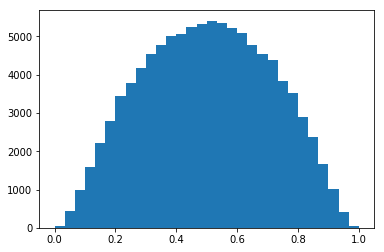

In [80]:
plt.hist(x1.detach().numpy().flatten(), 30, range=(0, 1))

In [113]:
class Model(nn.Module):
    
    def __init__(self):
        super(Model, self).__init__()
        self.hidden_size = 100
        
        self.linear1 = nn.Linear(100, self.hidden_size)
        self.linear2 = nn.Linear(self.hidden_size, self.hidden_size)
        self.linear3 = nn.Linear(self.hidden_size, self.hidden_size)
        self.linear4 = nn.Linear(self.hidden_size, self.hidden_size)
        self.linear5 = nn.Linear(self.hidden_size, self.hidden_size)
    
    def forward(self, x):
        x1 = F.relu(self.linear1(x))
        x2 = F.relu(self.linear2(x1))
        x3 = F.relu(self.linear3(x2))
        x4 = F.relu(self.linear4(x3))
        x5 = F.relu(self.linear5(x4))
        return x1, x2, x3, x4, x5

model = Model()

def weights_init(m):
    classname = m.__class__.__name__
    if classname.find('Linear') != -1:
#         nn.init.xavier_normal_(m.weight)
        nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
model.apply(weights_init)

Model(
  (linear1): Linear(in_features=100, out_features=100, bias=True)
  (linear2): Linear(in_features=100, out_features=100, bias=True)
  (linear3): Linear(in_features=100, out_features=100, bias=True)
  (linear4): Linear(in_features=100, out_features=100, bias=True)
  (linear5): Linear(in_features=100, out_features=100, bias=True)
)

In [114]:
x1, x2, x3, x4, x5 = model(x)

(array([50901.,   938.,   956.,   956.,   947.,   947.,   927.,   932.,
          926.,   905.,   950.,   897.,   942.,   891.,   888.,   855.,
          895.,   852.,   869.,   841.,   872.,   792.,   778.,   869.,
          795.,   819.,   762.,   758.,   747.,   726.]),
 array([0.        , 0.03333333, 0.06666667, 0.1       , 0.13333333,
        0.16666667, 0.2       , 0.23333333, 0.26666667, 0.3       ,
        0.33333333, 0.36666667, 0.4       , 0.43333333, 0.46666667,
        0.5       , 0.53333333, 0.56666667, 0.6       , 0.63333333,
        0.66666667, 0.7       , 0.73333333, 0.76666667, 0.8       ,
        0.83333333, 0.86666667, 0.9       , 0.93333333, 0.96666667,
        1.        ]),
 <a list of 30 Patch objects>)

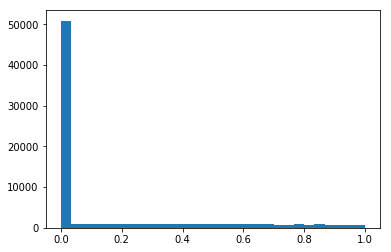

In [115]:
plt.hist(x1.detach().numpy().flatten(), 30, range=(0, 1))

(array([52267.,  2316.,  2251.,  2223.,  2199.,  2233.,  2168.,  2132.,
         2012.,  1966.,  1918.,  1823.,  1760.,  1712.,  1641.,  1583.,
         1502.,  1390.,  1328.,  1260.,  1016.,  1056.,  1002.,   915.,
          811.,   809.,   722.,   659.,   613.,   549.]),
 array([0.        , 0.03333333, 0.06666667, 0.1       , 0.13333333,
        0.16666667, 0.2       , 0.23333333, 0.26666667, 0.3       ,
        0.33333333, 0.36666667, 0.4       , 0.43333333, 0.46666667,
        0.5       , 0.53333333, 0.56666667, 0.6       , 0.63333333,
        0.66666667, 0.7       , 0.73333333, 0.76666667, 0.8       ,
        0.83333333, 0.86666667, 0.9       , 0.93333333, 0.96666667,
        1.        ]),
 <a list of 30 Patch objects>)

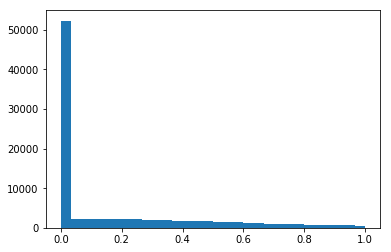

In [161]:
class Model(nn.Module):
    
    def __init__(self):
        super(Model, self).__init__()
        self.hidden_size = 100
        
        self.linear1 = nn.Linear(100, self.hidden_size)
        self.linear2 = nn.Linear(self.hidden_size, self.hidden_size)
        self.linear3 = nn.Linear(self.hidden_size, self.hidden_size)
        self.linear4 = nn.Linear(self.hidden_size, self.hidden_size)
        self.linear5 = nn.Linear(self.hidden_size, self.hidden_size)
    
    def forward(self, x):
        x1 = F.relu(self.linear1(x))
        x2 = F.relu(self.linear2(x1))
        x3 = F.relu(self.linear3(x2))
        x4 = F.relu(self.linear4(x3))
        x5 = F.relu(self.linear5(x4))
        return x1, x2, x3, x4, x5

model = Model()
x1, x2, x3, x4, x5 = model(x)
plt.hist(x1.detach().numpy().flatten(), 30, range=(0, 1))

(array([6843., 3622., 2915., 2646., 2383., 2103., 1980., 1809., 1704.,
        1559., 1527., 1367., 1295., 1186., 1133.,  968.,  921.,  927.,
         858.,  825.,  776.,  671.,  677.,  623.,  568.,  563.,  468.,
         508.,  496.,  411.]),
 array([0.        , 0.03333333, 0.06666667, 0.1       , 0.13333333,
        0.16666667, 0.2       , 0.23333333, 0.26666667, 0.3       ,
        0.33333333, 0.36666667, 0.4       , 0.43333333, 0.46666667,
        0.5       , 0.53333333, 0.56666667, 0.6       , 0.63333333,
        0.66666667, 0.7       , 0.73333333, 0.76666667, 0.8       ,
        0.83333333, 0.86666667, 0.9       , 0.93333333, 0.96666667,
        1.        ]),
 <a list of 30 Patch objects>)

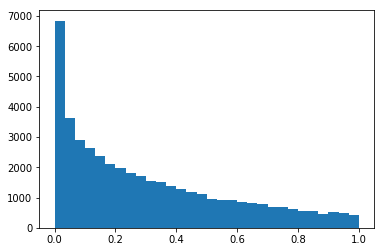

In [159]:
class Model(nn.Module):
    
    def __init__(self):
        super(Model, self).__init__()
        self.hidden_size = 100
        
        self.linear1 = nn.Linear(100, self.hidden_size)
        self.linear2 = nn.Linear(self.hidden_size, self.hidden_size)
        self.linear3 = nn.Linear(self.hidden_size, self.hidden_size)
        self.linear4 = nn.Linear(self.hidden_size, self.hidden_size)
        self.linear5 = nn.Linear(self.hidden_size, self.hidden_size)

        self.bn1 = nn.BatchNorm1d(self.hidden_size)
        self.bn2 = nn.BatchNorm1d(self.hidden_size)
        self.bn3 = nn.BatchNorm1d(self.hidden_size)
        self.bn4 = nn.BatchNorm1d(self.hidden_size)
        self.bn5 = nn.BatchNorm1d(self.hidden_size)

    def forward(self, x):
        x1 = self.bn1(self.linear1(x))
        x1relu = F.relu(x1)
        x2 = self.bn2(self.linear2(x1relu))
        x2relu = F.relu(x2)
        x3 = self.bn3(self.linear3(x2relu))
        x3relu = F.relu(x3)
        x4 = self.bn4(self.linear4(x3relu))
        x4relu = F.relu(x4)
        x5 = self.bn5(self.linear5(x4relu))
        x5relu = F.relu(x5)
        return x1, x2, x3, x4, x5

model = Model()
x1, x2, x3, x4, x5 = model(x)
plt.hist(x1.detach().numpy().flatten(), 30, range=(0, 1))

(array([2166., 2096., 2206., 2032., 2127., 2039., 2001., 2006., 1961.,
        1929., 1855., 1773., 1739., 1648., 1577., 1554., 1467., 1415.,
        1308., 1278., 1169., 1104., 1003.,  924.,  876.,  830.,  805.,
         686.,  616.,  600.]),
 array([0.        , 0.03333333, 0.06666667, 0.1       , 0.13333333,
        0.16666667, 0.2       , 0.23333333, 0.26666667, 0.3       ,
        0.33333333, 0.36666667, 0.4       , 0.43333333, 0.46666667,
        0.5       , 0.53333333, 0.56666667, 0.6       , 0.63333333,
        0.66666667, 0.7       , 0.73333333, 0.76666667, 0.8       ,
        0.83333333, 0.86666667, 0.9       , 0.93333333, 0.96666667,
        1.        ]),
 <a list of 30 Patch objects>)

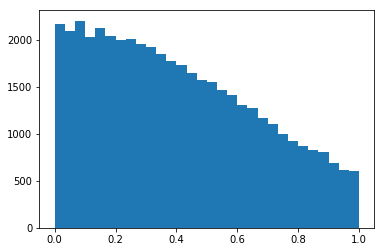

In [160]:
class Model(nn.Module):
    
    def __init__(self):
        super(Model, self).__init__()
        self.hidden_size = 100
        
        self.linear1 = nn.Linear(100, self.hidden_size)
        self.linear2 = nn.Linear(self.hidden_size, self.hidden_size)
        self.linear3 = nn.Linear(self.hidden_size, self.hidden_size)
        self.linear4 = nn.Linear(self.hidden_size, self.hidden_size)
        self.linear5 = nn.Linear(self.hidden_size, self.hidden_size)

    def forward(self, x):
        x1 = F.selu(self.linear1(x))
        x2 = F.selu(self.linear2(x1))
        x3 = F.selu(self.linear3(x2))
        x4 = F.selu(self.linear4(x3))
        x5 = F.selu(self.linear5(x4))
        return x1, x2, x3, x4, x5

model = Model()
x1, x2, x3, x4, x5 = model(x)
plt.hist(x1.detach().numpy().flatten(), 30, range=(0, 1))